<h2 align="center"> The University of Adelaide, School of Computer Science </h2>
<h1 align="center"><strong><b> Applied Natural Language Processing </b></strong></h1>
<h2 align="center"> Semester 1, 2023 Assignment 1: Building a sentiment analysis system with Naïve Bayes </h2>
<h2 align="center"> Author: Akide Liu </h2>
<h3 align="center"> Student ID: a1743748 </h3>


## 0. Import libraries and set up the environment

In [1]:
# import libs
from utils import *

# Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## 1. Write code to read data from the dataset file and perform text pre-processing. You have the flexibility to choose the text-processing method. However, you need use at least two text-processing steps, e.g., stop words removal and stemming or Byte pair encoding. (15%)

### 1.1 read data from the dataset file to a dataframe

In [2]:
# Read the CSV file
df = pd.read_csv('imdb_master.csv', encoding='ISO-8859-1')

df = df[df['label'] != 'unsup']
# print the first 5 rows
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


### 1.2 perform text pre-processing (Stop words removal)

In [3]:
len(df['review'].to_list())

50000

In [4]:
df["review_remove_stop_words"] = ""


def remove_stop_words(row):
    # tokenize the sentence
    tokens = word_tokenize(row)
    # remove stop words
    tokens = [w for w in tokens if not w in nltk.corpus.stopwords.words('english')]
    # join the tokens
    tokens = ' '.join(tokens)
    # update the dataframe
    return tokens


result = track_parallel_progress(remove_stop_words, df['review'].to_list(), nproc=10)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [5]:
df["review_remove_stop_words"] = result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                50000 non-null  int64 
 1   type                      50000 non-null  object
 2   review                    50000 non-null  object
 3   label                     50000 non-null  object
 4   file                      50000 non-null  object
 5   review_remove_stop_words  50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [6]:
text = df['review'][0]
print(
    f"Original text:\n "
    f"text length : {len(text)}\n "
    f"{text}",
)

print(
    f"Processed text:\n "
    f"text length : {len(result[0])}\n "
    f"{result[0]}",
)

Original text:
 text length : 900
 Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
Processed text:
 text length : 580
 Once Mr. Costner dragged mov

### 1.3 perform text pre-processing (Stemming)

In [7]:
def stemming(row):
    # tokenize the sentence
    tokens = word_tokenize(row)
    # stemming
    tokens = [nltk.stem.PorterStemmer().stem(w) for w in tokens]
    # join the tokens
    tokens = ' '.join(tokens)
    # update the dataframe
    return tokens


result = track_parallel_progress(stemming, df['review_remove_stop_words'].to_list(), nproc=10)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [8]:
df["review_stemming"] = result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                50000 non-null  int64 
 1   type                      50000 non-null  object
 2   review                    50000 non-null  object
 3   label                     50000 non-null  object
 4   file                      50000 non-null  object
 5   review_remove_stop_words  50000 non-null  object
 6   review_stemming           50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


In [9]:
text = df['review'][0]
print(
    f"Original text:\n "
    f"text length : {len(text)}\n "
    f"{text}",
)

print(
    f"Processed text:\n "
    f"text length : {len(result[0])}\n "
    f"{result[0]}",
)

Original text:
 text length : 900
 Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
Processed text:
 text length : 528
 onc mr. costner drag movi fa

### 1.4 Byte pair

ref : https://huggingface.co/course/chapter6/5?fw=pt
PS: Following code is used for learning the implementation of Byte pair encoding, if you think it is mess, plz skip it.

In [10]:
texts = df['review'].to_list()[:2]
texts

["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
 "This is an example of why the majority of action films are the same. Generic and boring, ther

In [11]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [12]:
# compute the frequency of each word
from collections import defaultdict

word_freqs = defaultdict(int)

for text in texts:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1

print(word_freqs)

defaultdict(<class 'int'>, {'Once': 1, 'Ġagain': 1, 'ĠMr': 1, '.': 18, 'ĠCostner': 4, 'Ġhas': 3, 'Ġdragged': 1, 'Ġout': 1, 'Ġa': 6, 'Ġmovie': 1, 'Ġfor': 4, 'Ġfar': 1, 'Ġlonger': 1, 'Ġthan': 2, 'Ġnecessary': 1, 'ĠAside': 1, 'Ġfrom': 2, 'Ġthe': 18, 'Ġterrific': 1, 'Ġsea': 1, 'Ġrescue': 1, 'Ġsequences': 1, ',': 23, 'Ġof': 10, 'Ġwhich': 5, 'Ġthere': 2, 'Ġare': 7, 'Ġvery': 2, 'Ġfew': 1, 'ĠI': 5, 'Ġjust': 1, 'Ġdid': 2, 'Ġnot': 3, 'Ġcare': 3, 'Ġabout': 3, 'Ġany': 1, 'Ġcharacters': 1, 'ĠMost': 1, 'Ġus': 2, 'Ġhave': 1, 'Ġghosts': 2, 'Ġin': 4, 'Ġcloset': 2, 'Ġand': 11, "'s": 5, 'Ġcharacter': 5, 'Ġrealized': 1, 'Ġearly': 1, 'Ġon': 2, 'Ġthen': 2, 'Ġforgotten': 1, 'Ġuntil': 1, 'Ġmuch': 1, 'Ġlater': 1, 'Ġby': 1, 'Ġtime': 1, 'ĠThe': 3, 'Ġwe': 2, 'Ġshould': 1, 'Ġreally': 3, 'Ġis': 6, 'Ġcocky': 1, 'Ġoverconfident': 1, 'ĠAshton': 1, 'ĠKutcher': 3, 'Ġproblem': 1, 'Ġhe': 3, 'Ġcomes': 2, 'Ġoff': 2, 'Ġas': 1, 'Ġkid': 1, 'Ġwho': 2, 'Ġthinks': 1, 'Ġbetter': 4, 'Ġanyone': 1, 'Ġelse': 1, 'Ġaround': 1, 'Ġhim': 2

In [13]:
# compute the frequency of each word
alphabet = []

for word in word_freqs.keys():
    for letter in word:
        if letter not in alphabet:
            alphabet.append(letter)
alphabet

print(alphabet)

['O', 'n', 'c', 'e', 'Ġ', 'a', 'g', 'i', 'M', 'r', '.', 'C', 'o', 's', 't', 'h', 'd', 'u', 'm', 'v', 'f', 'l', 'y', 'A', 'q', ',', 'w', 'I', 'j', 'b', "'", 'z', 'T', 'k', 'K', 'p', 'H', 'F', 'W', 'N', 'x', 'G', '-', 'D', 'J', 'R', 'Y', 'U', 'B', 'L', 'P', '?', '<', '/', '>', '4', '1', '0']


In [14]:
# add endoftext token for gpt2
vocab = ["<|endoftext|>"] + alphabet.copy()
# split each word into characters
splits = {word: [c for c in word] for word in word_freqs.keys()}


# compute the frequency of each character
def compute_pair_freqs(splits):
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        _split = splits[word]
        if len(_split) == 1:
            continue
        for i in range(len(_split) - 1):
            pair = (_split[i], _split[i + 1])
            pair_freqs[pair] += freq
    return pair_freqs


pair_freqs = compute_pair_freqs(splits)

pair_freqs = dict(sorted(pair_freqs.items(), key=lambda item: item[1], reverse=True))
# show the pair wise frequency
for i, key in enumerate(pair_freqs.keys()):
    print(f"{key}: {pair_freqs[key]}")
    if i >= 5:
        break

('Ġ', 't'): 51
('Ġ', 'a'): 49
('t', 'h'): 44
('h', 'e'): 42
('e', 'r'): 41
('Ġ', 'w'): 34


In [15]:
# find the bast pair and max frequency
best_pair = ""
max_freq = None

for pair, freq in pair_freqs.items():
    if max_freq is None or max_freq < freq:
        best_pair = pair
        max_freq = freq

print(best_pair, max_freq)

('Ġ', 't') 51


In [16]:
# merge the best pair
merges = {("Ġ", "t"): "Ġt"}
vocab.append("Ġt")

In [17]:

# merge the pair for splits
def merge_pair(a, b, splits):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue

        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                split = split[:i] + [a + b] + split[i + 2:]
            else:
                i += 1
        splits[word] = split
    return splits


splits = merge_pair("Ġ", "t", splits)
print(splits["Ġterrific"])

['Ġt', 'e', 'r', 'r', 'i', 'f', 'i', 'c']


In [18]:
splits

{'Once': ['O', 'n', 'c', 'e'],
 'Ġagain': ['Ġ', 'a', 'g', 'a', 'i', 'n'],
 'ĠMr': ['Ġ', 'M', 'r'],
 '.': ['.'],
 'ĠCostner': ['Ġ', 'C', 'o', 's', 't', 'n', 'e', 'r'],
 'Ġhas': ['Ġ', 'h', 'a', 's'],
 'Ġdragged': ['Ġ', 'd', 'r', 'a', 'g', 'g', 'e', 'd'],
 'Ġout': ['Ġ', 'o', 'u', 't'],
 'Ġa': ['Ġ', 'a'],
 'Ġmovie': ['Ġ', 'm', 'o', 'v', 'i', 'e'],
 'Ġfor': ['Ġ', 'f', 'o', 'r'],
 'Ġfar': ['Ġ', 'f', 'a', 'r'],
 'Ġlonger': ['Ġ', 'l', 'o', 'n', 'g', 'e', 'r'],
 'Ġthan': ['Ġt', 'h', 'a', 'n'],
 'Ġnecessary': ['Ġ', 'n', 'e', 'c', 'e', 's', 's', 'a', 'r', 'y'],
 'ĠAside': ['Ġ', 'A', 's', 'i', 'd', 'e'],
 'Ġfrom': ['Ġ', 'f', 'r', 'o', 'm'],
 'Ġthe': ['Ġt', 'h', 'e'],
 'Ġterrific': ['Ġt', 'e', 'r', 'r', 'i', 'f', 'i', 'c'],
 'Ġsea': ['Ġ', 's', 'e', 'a'],
 'Ġrescue': ['Ġ', 'r', 'e', 's', 'c', 'u', 'e'],
 'Ġsequences': ['Ġ', 's', 'e', 'q', 'u', 'e', 'n', 'c', 'e', 's'],
 ',': [','],
 'Ġof': ['Ġ', 'o', 'f'],
 'Ġwhich': ['Ġ', 'w', 'h', 'i', 'c', 'h'],
 'Ġthere': ['Ġt', 'h', 'e', 'r', 'e'],
 'Ġare': ['Ġ

In [19]:
vocab_size = 500

# repeat above and merge the best pair
while len(vocab) < vocab_size:
    pair_freqs = compute_pair_freqs(splits)
    best_pair = ""
    max_freq = None
    for pair, freq in pair_freqs.items():
        if max_freq is None or max_freq < freq:
            best_pair = pair
            max_freq = freq
    splits = merge_pair(*best_pair, splits)
    merges[best_pair] = best_pair[0] + best_pair[1]
    vocab.append(best_pair[0] + best_pair[1])

In [20]:
print(merges)
print(vocab)


{('Ġ', 't'): 'Ġt', ('Ġ', 'a'): 'Ġa', ('h', 'e'): 'he', ('Ġ', 'w'): 'Ġw', ('i', 'n'): 'in', ('e', 'r'): 'er', ('Ġ', 'o'): 'Ġo', ('r', 'e'): 're', ('Ġ', 'c'): 'Ġc', ('Ġt', 'he'): 'Ġthe', ('in', 'g'): 'ing', ('h', 'a'): 'ha', ('Ġ', 's'): 'Ġs', ('n', 'd'): 'nd', ('Ġ', 'f'): 'Ġf', ('h', 'i'): 'hi', ('l', 'l'): 'll', ('s', 't'): 'st', ('c', 't'): 'ct', ('r', 'a'): 'ra', ('o', 'r'): 'or', ('Ġ', 'b'): 'Ġb', ('e', 'n'): 'en', ('Ġo', 'f'): 'Ġof', ('Ġ', 'i'): 'Ġi', ('Ġ', 'd'): 'Ġd', ('o', 'n'): 'on', ('c', 'h'): 'ch', ('Ġa', 'nd'): 'Ġand', ('Ġw', 'a'): 'Ġwa', ('u', 't'): 'ut', ('Ġ', 'I'): 'ĠI', ('Ġ', 'm'): 'Ġm', ('hi', 's'): 'his', ('c', 'e'): 'ce', ('o', 'st'): 'ost', ('Ġ', 'n'): 'Ġn', ('r', 'i'): 'ri', ('Ġs', 'e'): 'Ġse', ('v', 'er'): 'ver', ('e', 't'): 'et', ('m', 'e'): 'me', ('Ġ', 'p'): 'Ġp', ('Ġ', 'C'): 'ĠC', ('a', 'r'): 'ar', ('Ġ', 're'): 'Ġre', ('Ġa', 're'): 'Ġare', ('ra', 'ct'): 'ract', ('Ġ', 'e'): 'Ġe', ('Ġo', 'n'): 'Ġon', ('i', 'l'): 'il', ('Ġc', 'o'): 'Ġco', ('l', 'e'): 'le', ('Ġ', 'he

In [21]:

# define the tokenizer
def tokenize(text):
    pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
    pre_tokenized_text = [word for word, offset in pre_tokenize_result]
    splits = [[l for l in word] for word in pre_tokenized_text]
    for pair, merge in merges.items():
        for idx, split in enumerate(splits):
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    split = split[:i] + [merge] + split[i + 2:]
                else:
                    i += 1
            splits[idx] = split

    return sum(splits, [])


print(
    f"Original text:\n "
    f"text length : {len(texts[0])}\n "
    f"{texts[0]}",
)

print(
    f"Processed text:\n "
    f"text length : {len(tokenize(texts[0]))}\n "
    f"{tokenize(texts[0])}",
)

Original text:
 text length : 900
 Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
Processed text:
 text length : 188
 ['Once', 'Ġagain', 'ĠMr', '.

## 2. Write code to build the Naïve Bayes classifier from the training set and evaluate its performance on the test set with F1 measure. (20%)

In [10]:
# count the number of positive , negative, unsup reviews
df["label"].value_counts(), df['type'].value_counts()

(neg    25000
 pos    25000
 Name: label, dtype: int64,
 test     25000
 train    25000
 Name: type, dtype: int64)

### 2.1 add Dataset Generator

In [11]:
# split the data into train and test

class DatasetGenerator:

    @staticmethod
    def generate(df, type, preprocessing='review'):
        available_type = ['train', 'test']
        available_preprocessing = df.columns

        assert type in available_type, f"Type must be one of {available_type}"
        assert preprocessing in available_preprocessing, f"Label must be one of {available_preprocessing}"

        filter_df = df[(df['type'] == type) & (df['label'] != 'unsup')]
        x, y = filter_df[preprocessing].values, filter_df['label'].values

        return x, y



### 2.2 Implement Naive Bayes Classifier

In [12]:

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_word_counts = defaultdict(Counter)
        self.class_counts = defaultdict(int)
        self.vocabulary = set()
        self.bag_of_words = None

    def _build_class_table(self, y_train):
        self.classes = set(y_train)
        for c in self.classes:
            self.class_counts[c] = 0

    def _build_bag_of_words_vector(self, text):
        # Initialize a vector with the same length as the vocabulary
        vector = [0] * len(self.vocabulary)
        # Create a dictionary to map words to indices
        word_to_index = {word: i for i, word in enumerate(self.vocabulary)}

        # Tokenize the input text
        words = text.split()

        # Count the occurrences of each word in the text
        for word in words:
            if word in word_to_index:
                vector[word_to_index[word]] += 1

        return vector

    def train(self, X_train, y_train):
        # Calculate the count of each class and each word in each class
        self._build_class_table(y_train)
        self.bag_of_words = [self._build_bag_of_words_vector(x) for x in X_train]
        for x, y in tqdm(zip(X_train, y_train)):
            self.class_counts[y] += 1
            for word in x.split():
                if word not in self.class_word_counts[y]:
                    self.class_word_counts[y][word] = 0
                self.class_word_counts[y][word] += 1
                self.vocabulary.add(word)

    def predict(self, X_test):
        # Calculate the probability of each class for each test instance
        predictions = []
        for x in X_test:
            scores = [self.calculate_score(x, c) for c in self.classes]
            best_class = list(self.classes)[np.argmax(scores)]
            predictions.append(best_class)
        return predictions

    def evaluate(self, X_test, y_test, metrics='all'):
        # Evaluate the model on the test set
        predictions = np.array(self.predict(X_test))

        accuracy = np.sum(predictions == y_test) / len(y_test)

        true_positives = np.sum(np.logical_and(predictions == y_test, y_test == 1))
        false_positives = np.sum(np.logical_and(predictions != y_test, y_test == 0))
        false_negatives = np.sum(np.logical_and(predictions != y_test, y_test == 1))

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1score = 2 * precision * recall / (precision + recall)

        return edict({
            'accuracy': accuracy,
            'f1score': f1score,
            'precision': precision,
            'recall': recall
        })

    def calculate_score(self, x, c):
        # Calculate the score of a test instance for a given class
        # score calculated by P(c) * product(P(w|c))
        # ref : https://www.youtube.com/watch?v=O2L2Uv9pdDA
        # ref : https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
        score = self.class_counts[c] / sum(self.class_counts.values())
        # score = self.class_counts[c]
        for word in x.split():
            if word in self.class_word_counts[c]:
                count = self.class_word_counts[c][word]
            else:
                count = 0
            score *= (count + 1) / (self.class_counts[c] + len(self.vocabulary))
        return np.log(score) if score > 0 else 0 # avoid underflow

# define the function to train and test one time
def train_test_one_time(data, preprocessing='review', model=NaiveBayesClassifier, is_print=True, **kwargs):
    X_train, y_train = DatasetGenerator.generate(data, 'train', preprocessing=preprocessing)
    nb = model(**kwargs)
    nb.train(X_train, y_train)

    X_test, y_test = DatasetGenerator.generate(data, 'test', preprocessing=preprocessing)
    predictions = nb.predict(X_test)
    score = nb.evaluate(X_test, y_test, metrics='f1')
    if is_print:
        print(f"f1_score: {score.f1score}")
        print(f"accuracy: {score.accuracy}")
        print(f"precision: {score.precision}")
        print(f"recall: {score.recall}")
    else:
        return dict(
            f1_score=score.f1score,
            accuracy=score.accuracy,
            precision=score.precision,
            recall=score.recall,
            predictions=predictions,
            nb=nb
        )

### 2.3 Compare the performance of the classifier with different preprocessing methods

#### 2.3.1 w/o preprocessing

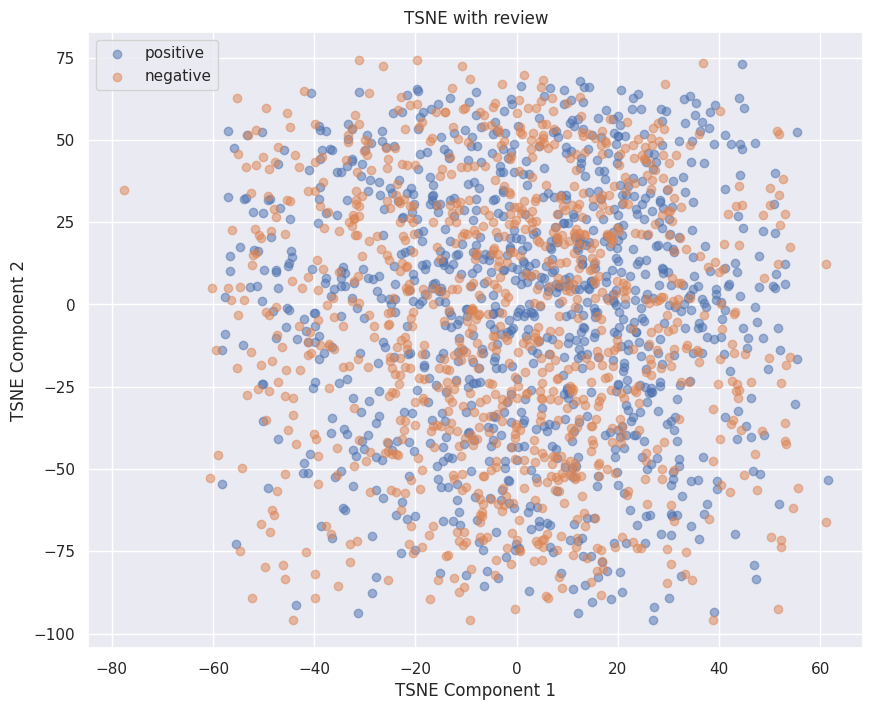

In [25]:
dimension_reduction(df, preprocessing='review')

In [26]:
train_test_one_time(df, preprocessing='review')

0it [00:00, ?it/s]

f1_score: 0.5738403852447848
accuracy: 0.61892
precision: 0.7061449037501748
recall: 0.61892


#### 2.3.2 w preprocessing

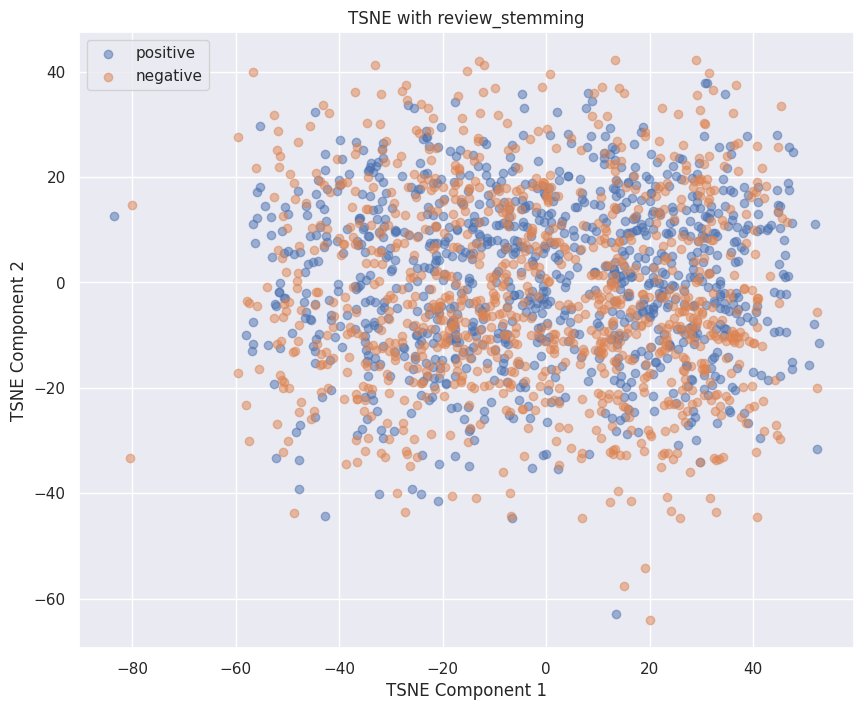

In [27]:
dimension_reduction(df, preprocessing='review_stemming')

In [28]:
train_test_one_time(df, preprocessing='review_stemming')

0it [00:00, ?it/s]

f1_score: 0.7113343208132317
accuracy: 0.7206
precision: 0.7530957831780862
recall: 0.7206


## 3. Investigate on the impact of different factors in the pipeline of building the classification system. For example, you can conduct experiment to examine the impact of using Byte-pair-encoding for text normalization or the impact of using add-k smoothing for building the Naïve Bayes classifier. At least two factors need to be investigated. Analysing more factors are encouraged and you may earn up to 5% bonus points from that (the total mark is capped to 100%). (15%)

### 3.1 pretrained GPT-2 Byte-pair-encoding Tokenizer


In [13]:
# Load pre-trained GPT-2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

def tokenize(row):
    # tokenize the sentence
    tokens = tokenizer.tokenize(row, max_length=1024, truncation=True)
    # join the tokens
    tokens = ' '.join(tokens)
    # update the dataframe
    return tokens

df['review_bpe'] = track_parallel_progress(tokenize, df['review_stemming'].to_list(), nproc=10)

train_test_one_time(df, preprocessing='review_bpe')

  0%|          | 0/50000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

f1_score: 0.7413301075278054
accuracy: 0.7456
precision: 0.7629630397104821
recall: 0.7456


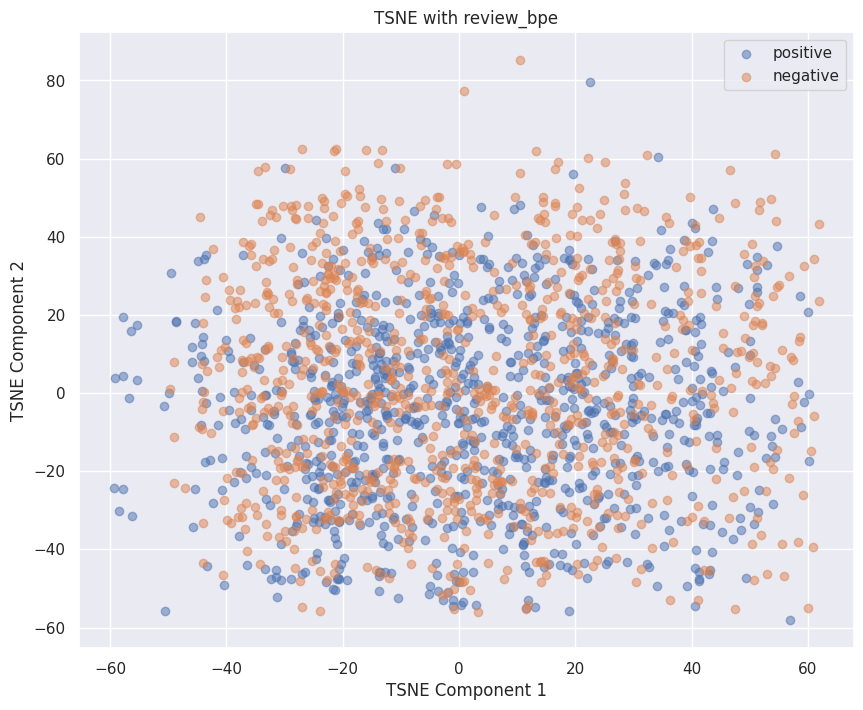

In [14]:
dimension_reduction(df, preprocessing='review_bpe')

### 3.2 Train Own Byte-pair-encoding

  0%|          | 0/50000 [00:00<?, ?it/s]

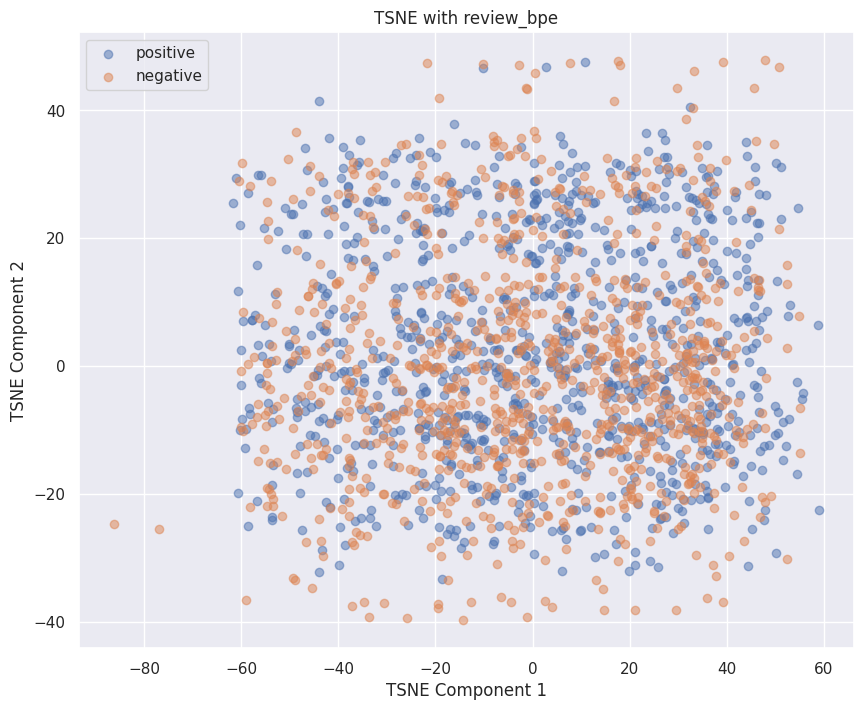

In [18]:
import os

os.environ['TOKENIZERS_PARALLELISM'] = 'true'
# using the full dataset to train the tokenizer
df_full = pd.read_csv('imdb_master.csv', encoding='ISO-8859-1')

# train a BPE tokenizer
tokenizer = Tokenizer(BPE())
trainer = BpeTrainer()
tokenizer.train_from_iterator(df['review_stemming'], trainer)


def tokenize(row):
    # tokenize the sentence
    tokens = tokenizer.encode(row)
    # join the tokens
    tokens = ' '.join(tokens.tokens)
    # update the dataframe
    return tokens


df['review_bpe']  = track_parallel_progress(tokenize, df['review_stemming'].to_list(), nproc=10)

dimension_reduction(df, preprocessing='review_bpe')

In [19]:
df['review_bpe'][0]

"onc  mr.  costner  drag  movi far  longer  necessari  . asid  terrif  sea  rescu  sequenc  , i  care charact  . most  us  ghost  clo set ,  costner  's charact  realiz  earli ,  forgotten  much  later ,  time i  care  . the charact  realli care  cock i ,  over confid  ashton  kutcher  . the problem  come  kid  think 's  better  anyon els  around  show sign  clutter  closet  . hi  obstacl  appear  win  costner  . final  well  past  half way  point  stin ker ,  costner  tell us  kutcher  's  ghost  . we  told  kutcher  driven  best  prior  inkl  foreshadow  . no  magic  , i could  keep  turn  hour  ."

In [20]:
train_test_one_time(df, preprocessing='review_bpe')

0it [00:00, ?it/s]

f1_score: 0.765411769845988
accuracy: 0.76724
precision: 0.7758388438841225
recall: 0.7672399999999999


### 3.2 Add-k smoothing

In [21]:
class KSmoothingNaiveBayesClassifier(NaiveBayesClassifier):
    def __init__(self, k=1):
        super().__init__()
        self.k = k

    def calculate_score(self, x, c):
        # Calculate the score of a test instance for a given class
        score = (self.class_counts[c]) / sum(self.class_counts.values())
        for word in x.split():
            if word in self.class_word_counts[c]:
                count = self.class_word_counts[c][word]
            else:
                count = 0
            score *= (count + self.k) / (self.class_counts[c] + self.k * len(self.vocabulary))
        return np.log(score) if score > 0 else 0

In [22]:
train_test_one_time(df, preprocessing='review_bpe', model=KSmoothingNaiveBayesClassifier, k=3)

0it [00:00, ?it/s]

f1_score: 0.7375887109360537
accuracy: 0.74188
precision: 0.7588095554127942
recall: 0.74188


In [23]:
metrics = []
iter_range =  np.arange(0.1, 2.2, 0.5)
for k in iter_range:
    print(f'k={k}')
    metric = train_test_one_time(df, preprocessing='review_bpe', model=KSmoothingNaiveBayesClassifier, k=k, is_print=False)
    metrics.append(metric)

k=0.1


0it [00:00, ?it/s]

k=0.6


0it [00:00, ?it/s]

k=1.1


0it [00:00, ?it/s]

k=1.6


0it [00:00, ?it/s]

k=2.1


0it [00:00, ?it/s]

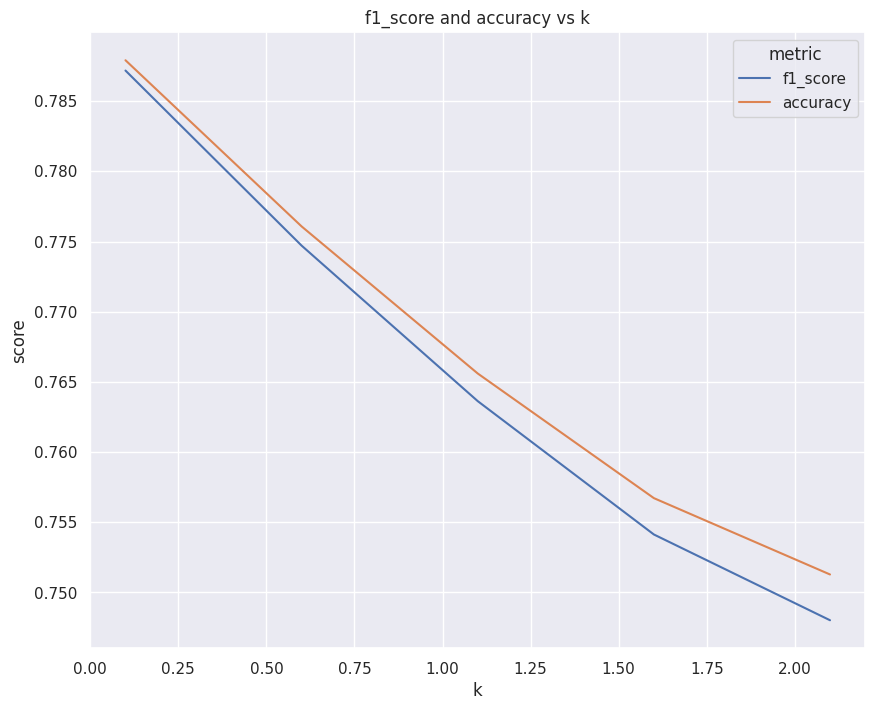

     k  f1_score  accuracy  precision   recall
0  0.1  0.787186   0.78792   0.791947  0.78792
1  0.6  0.774712   0.77608   0.782952  0.77608
2  1.1  0.763631   0.76560   0.774757  0.76560
3  1.6  0.754130   0.75672   0.768014  0.75672
4  2.1  0.748019   0.75128   0.764998  0.75128


In [24]:
info = plot_multiple_run_results(metrics, iter_range, 'f1_score and accuracy vs k')
print(info)


### 3.3 Optimize the Algorithm in Naive Bayes Classifier

In [25]:
class OptimizedKSmoothingNaiveBayesClassifier(KSmoothingNaiveBayesClassifier):
    def __init__(self, k=1):
        super().__init__()
        self.k = k

    def calculate_score(self, x, c):
        # Calculate the score of a test instance for a given class
        score = np.log(self.class_counts[c])
        for word in x.split():
            if word in self.class_word_counts[c]:
                count = self.class_word_counts[c][word]
            else:
                count = 0
            score += np.log(count + self.k) / (self.class_counts[c] + self.k * len(self.vocabulary))
        return score

In [28]:
metrics = []
iter_range =  np.arange(0.1, 5.0, 0.5)
for k in iter_range:
    print(f'k={k}')
    metric = train_test_one_time(df, preprocessing='review_bpe', model=OptimizedKSmoothingNaiveBayesClassifier, k=k, is_print=False)
    metrics.append(metric)

k=0.1


0it [00:00, ?it/s]

k=0.6


0it [00:00, ?it/s]

k=1.1


0it [00:00, ?it/s]

k=1.6


0it [00:00, ?it/s]

k=2.1


0it [00:00, ?it/s]

k=2.6


0it [00:00, ?it/s]

k=3.1


0it [00:00, ?it/s]

k=3.6


0it [00:00, ?it/s]

k=4.1


0it [00:00, ?it/s]

k=4.6


0it [00:00, ?it/s]

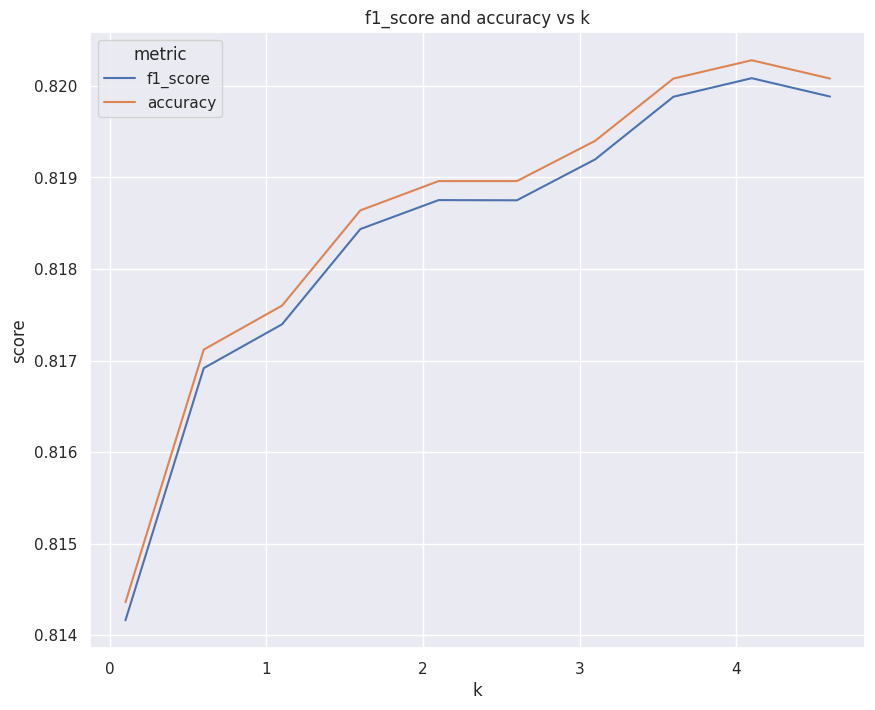

     k  f1_score  accuracy  precision   recall
0  0.1  0.814163   0.81436   0.815695  0.81436
1  0.6  0.816917   0.81712   0.818531  0.81712
2  1.1  0.817396   0.81760   0.819027  0.81760
3  1.6  0.818436   0.81864   0.820079  0.81864
4  2.1  0.818752   0.81896   0.820428  0.81896
5  2.6  0.818750   0.81896   0.820442  0.81896
6  3.1  0.819197   0.81940   0.820839  0.81940
7  3.6  0.819881   0.82008   0.821497  0.82008
8  4.1  0.820084   0.82028   0.821681  0.82028
9  4.6  0.819883   0.82008   0.821484  0.82008


In [29]:
info = plot_multiple_run_results(metrics, iter_range, 'f1_score and accuracy vs k')
print(info)


In [30]:
metrics = []
iter_range =  np.arange(0,100,10)
for k in iter_range:
    print(f'k={k}')
    metric = train_test_one_time(df, preprocessing='review_bpe', model=OptimizedKSmoothingNaiveBayesClassifier, k=k, is_print=False)
    metrics.append(metric)

k=0


0it [00:00, ?it/s]

/tmp/ipykernel_3686858/3475440938.py:14: RuntimeWarning: divide by zero encountered in log
  score += np.log(count + self.k) / (self.class_counts[c] + self.k * len(self.vocabulary))


k=10


0it [00:00, ?it/s]

k=20


0it [00:00, ?it/s]

k=30


0it [00:00, ?it/s]

k=40


0it [00:00, ?it/s]

k=50


0it [00:00, ?it/s]

k=60


0it [00:00, ?it/s]

k=70


0it [00:00, ?it/s]

k=80


0it [00:00, ?it/s]

k=90


0it [00:00, ?it/s]

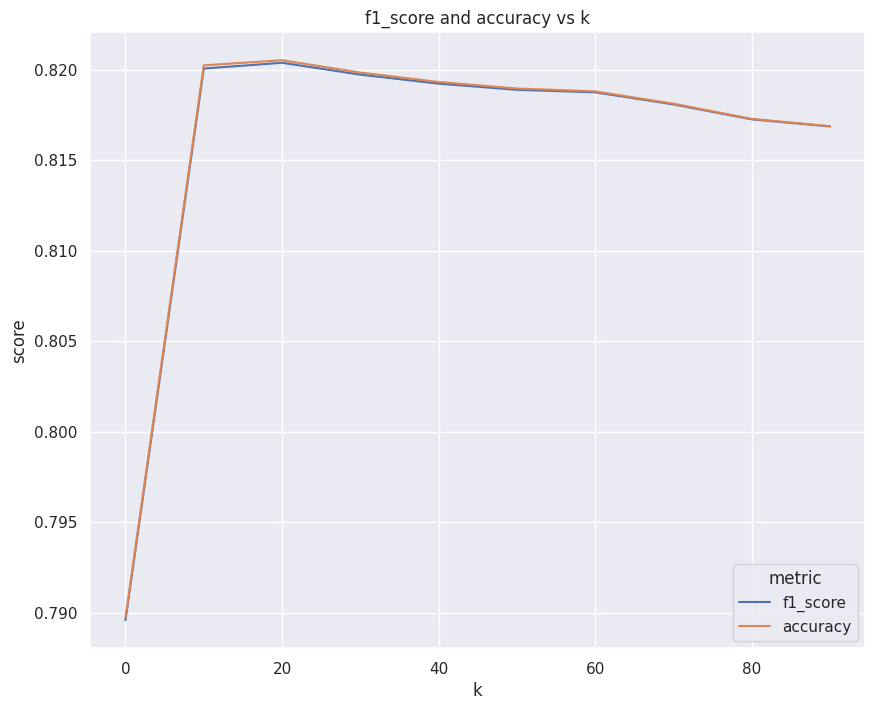

    k  f1_score  accuracy  precision   recall
0   0  0.789584   0.78972   0.790470  0.78972
1  10  0.820062   0.82024   0.821511  0.82024
2  20  0.820380   0.82052   0.821520  0.82052
3  30  0.819724   0.81984   0.820665  0.81984
4  40  0.819227   0.81932   0.819978  0.81932
5  50  0.818886   0.81896   0.819479  0.81896
6  60  0.818748   0.81880   0.819167  0.81880
7  70  0.818081   0.81812   0.818391  0.81812
8  80  0.817255   0.81728   0.817451  0.81728
9  90  0.816863   0.81688   0.817001  0.81688


In [31]:
info = plot_multiple_run_results(metrics, iter_range, 'f1_score and accuracy vs k')
print(info)

In [32]:
metrics = []
iter_range =  np.arange(0.1, 2.2, 0.5)
for k in iter_range:
    print(f'k={k}')
    metric = train_test_one_time(df, preprocessing='review_stemming', model=OptimizedKSmoothingNaiveBayesClassifier, k=k, is_print=False)
    metrics.append(metric)

k=0.1


0it [00:00, ?it/s]

k=0.6


0it [00:00, ?it/s]

k=1.1


0it [00:00, ?it/s]

k=1.6


0it [00:00, ?it/s]

k=2.1


0it [00:00, ?it/s]

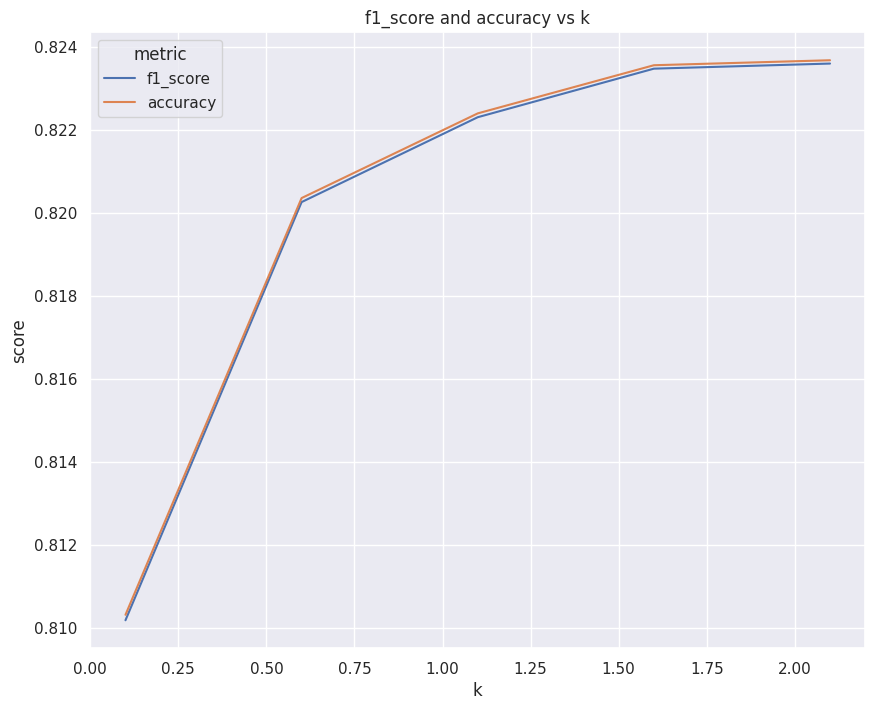

     k  f1_score  accuracy  precision   recall
0  0.1  0.810189   0.81032   0.811182  0.81032
1  0.6  0.820263   0.82036   0.821054  0.82036
2  1.1  0.822308   0.82240   0.823072  0.82240
3  1.6  0.823477   0.82356   0.824167  0.82356
4  2.1  0.823600   0.82368   0.824267  0.82368


In [33]:
info = plot_multiple_run_results(metrics, iter_range, 'f1_score and accuracy vs k')
print(info)

In [34]:
metrics = []
iter_range =  np.arange(0,100,10)
for k in iter_range:
    print(f'k={k}')
    metric = train_test_one_time(df, preprocessing='review_stemming', model=OptimizedKSmoothingNaiveBayesClassifier, k=k, is_print=False)
    metrics.append(metric)

k=0


0it [00:00, ?it/s]

/tmp/ipykernel_3686858/3475440938.py:14: RuntimeWarning: divide by zero encountered in log
  score += np.log(count + self.k) / (self.class_counts[c] + self.k * len(self.vocabulary))


k=10


0it [00:00, ?it/s]

k=20


0it [00:00, ?it/s]

k=30


0it [00:00, ?it/s]

k=40


0it [00:00, ?it/s]

k=50


0it [00:00, ?it/s]

k=60


0it [00:00, ?it/s]

k=70


0it [00:00, ?it/s]

k=80


0it [00:00, ?it/s]

k=90


0it [00:00, ?it/s]

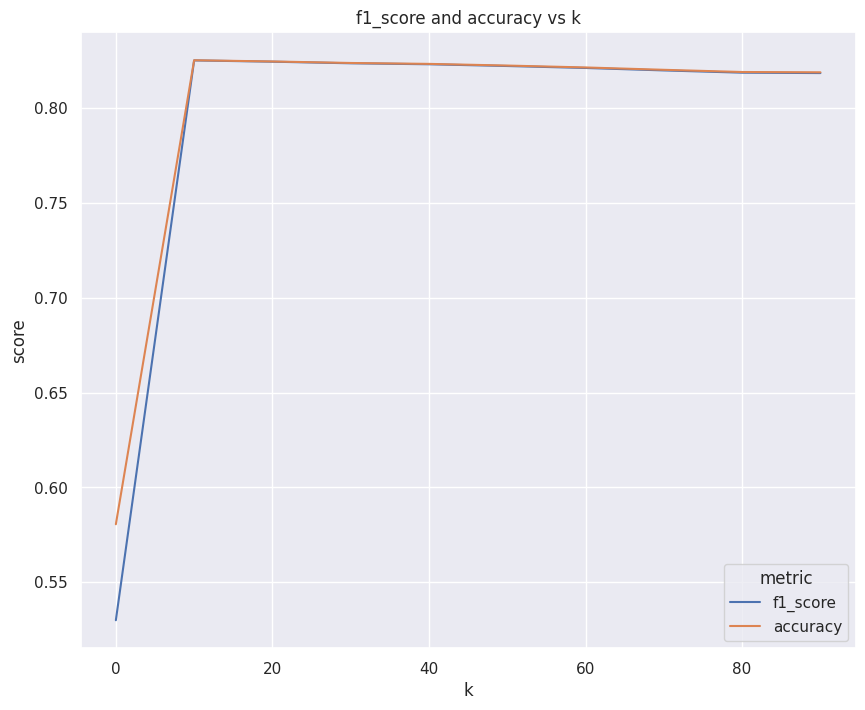

    k  f1_score  accuracy  precision   recall
0   0  0.529971   0.58060   0.641617  0.58060
1  10  0.825275   0.82536   0.825996  0.82536
2  20  0.824598   0.82472   0.825622  0.82472
3  30  0.823757   0.82392   0.825122  0.82392
4  40  0.823239   0.82344   0.824921  0.82344
5  50  0.822318   0.82256   0.824324  0.82256
6  60  0.821284   0.82156   0.823561  0.82156
7  70  0.819996   0.82032   0.822640  0.82032
8  80  0.818801   0.81916   0.821711  0.81916
9  90  0.818599   0.81900   0.821844  0.81900


In [35]:
info = plot_multiple_run_results(metrics, iter_range, 'f1_score and accuracy vs k')
print(info)

### 3.4 Train a Bert Model to do the classification

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   type        50000 non-null  object
 2   review      50000 non-null  object
 3   label       50000 non-null  object
 4   file        50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [5]:
df[df['type'] == 'train']['review']

25000    Story of a man who has unnatural feelings for ...
25001    Airport '77 starts as a brand new luxury 747 p...
25002    This film lacked something I couldn't put my f...
25003    Sorry everyone,,, I know this is supposed to b...
25004    When I was little my parents took me along to ...
                               ...                        
49995    Seeing as the vote average was pretty low, and...
49996    The plot had some wretched, unbelievable twist...
49997    I am amazed at how this movie(and most others ...
49998    A Christmas Together actually came before my t...
49999    Working-class romantic drama from director Mar...
Name: review, Length: 25000, dtype: object

In [9]:
# https://huggingface.co/docs/datasets/v2.4.0/en/loading#pandas-dataframe
df_bert_train = pd.DataFrame()
df_bert_train['text'] = df[df['type'] == 'train']['review']
df_bert_train['label'] = df[df['type'] == 'train']['label'].apply(lambda x: 1 if x == 'pos' else 0)

df_bert_test = pd.DataFrame()
df_bert_test['text'] = df[df['type'] == 'test']['review']
df_bert_test['label'] = df[df['type'] == 'test']['label'].apply(lambda x: 1 if x == 'pos' else 0)

bert_dataset_train = Dataset.from_pandas(df_bert_train)
bert_dataset_test = Dataset.from_pandas(df_bert_test)
bert_dataset_train

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 25000
})

In [10]:

pretrain = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(pretrain)

# tokenize and preprocess the dataset
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=512)

tokenized_imdb_train = bert_dataset_train.map(preprocess_function, batched=True)
tokenized_imdb_test = bert_dataset_test.map(preprocess_function, batched=True)


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [11]:
from transformers import DataCollatorWithPadding

# build data loader
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [14]:

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [15]:
df_bert_test["label"].unique()

array([0, 1])

In [16]:
# define the label mapping
id2label = {0: "neg", 1: "pos"}
label2id = {"neg": 0, "pos": 1}

In [17]:
# define the model and the training arguments

model = AutoModelForSequenceClassification.from_pretrained(
    pretrain, num_labels=2, id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:

# print gpu info by pytorch
print([torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())])

['NVIDIA A100-SXM4-40GB', 'NVIDIA A100-SXM4-40GB', 'NVIDIA A100-SXM4-40GB', 'NVIDIA A100-SXM4-40GB']


In [19]:
import os
os.environ["http_proxy"] = "http://10.34.41.2:9090"
os.environ["https_proxy"] = "http://10.34.41.2:9090"
os.environ["TOKENIZERS_PARALLELISM"] = "true"
from transformers import TrainingArguments, Trainer

In [20]:

training_args = TrainingArguments(
    disable_tqdm=False,
    output_dir="distilbert-base-uncased-imdb",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to='wandb',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb_train,
    eval_dataset=tokenized_imdb_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# trainer.set_logging(report_to="none")

# clear torch memory
import gc
gc.collect()
torch.cuda.empty_cache()

trainer.train()

/home/.local/lib/python3.8/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ak6. Use `wandb login --relogin` to force relogin


You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss


TrainOutput(global_step=980, training_loss=0.1201558443964744, metrics={'train_runtime': 482.6845, 'train_samples_per_second': 258.968, 'train_steps_per_second': 2.03, 'total_flos': 3.288888192e+16, 'train_loss': 0.1201558443964744, 'epoch': 5.0})

In [21]:
trainer.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.14525730907917023,
 'eval_accuracy': 0.9468,
 'eval_runtime': 27.6699,
 'eval_samples_per_second': 903.508,
 'eval_steps_per_second': 7.084,
 'epoch': 5.0}

In [23]:
import gc
gc.collect()
torch.cuda.empty_cache()


## Save the Notebook

In [36]:
import glob

files = glob.glob('*.py')
# outputs = glob.glob('*.csv')
outputs = glob.glob('*.png')
outputs += glob.glob('*.PNG')
outputs += glob.glob('*.txt')
# outputs = glob.glob('figures/*')
# outputs.append('download.sh')
import jovian

jovian.commit(project='akide/ANLP_assignment_1',
              filename='ANLP_A1.ipynb',
              files=files,
              new_project=False,
              outputs=outputs,
              environment='auto')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akide/anlp-assignment-1" on https://jovian.com/
[jovian] Capturing environment..


/bin/sh: 1: conda: not found
/bin/sh: 1: conda: not found
[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Uploading additional files...
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.com/akide/anlp-assignment-1


'https://jovian.com/akide/anlp-assignment-1'